In [ ]:
%load_ext autoreload
%autoreload 2

#########################################################################################
#########################################################################################
####### BEGIN OPTIONAL SECTION
####### Comment/Uncomment the following section whether you are running it from 
####### a local setup and not from Google Drive
#########################################################################################
#########################################################################################
"""
GLB_INSTALL_DEPENDENCIES = True
GLB_USE_DRIVE_ACCOUNT = True

# Here to define dependencies
if GLB_INSTALL_DEPENDENCIES:
    !pip install transformers

if GLB_USE_DRIVE_ACCOUNT:
  from google.colab import drive
  drive.mount('/content/drive')
  %cd /content/drive/MyDrive/"Colab Notebooks"
  username = "IsaacOlguin"
  repository =  "AutomatedTraumaDetectionInGCT"
  %cd {repository}
  %pwd
"""
#########################################################################################
#########################################################################################
####### END OPTIONAL SECTION
#########################################################################################
#########################################################################################

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import src.classification_model_utilities as mlclassif_utilities
import src.general_utilities as gral_utilities

In [ ]:
model_names = [ "bert-base-uncased", "nlpaueb/legal-bert-base-uncased", 
               "snowood1/ConfliBERT-scr-uncased", "GroNLP/hateBERT"]
models_statistics = [
    [{'epoch': 1, 'Training Loss': 0.2122794448158375, 'Training Accur.': 0.9141989188577847, 'Training Precision (macro)': 0.7172850588659349, 'Training Precision (micro)': 0.9141989188577847, 'Training Recall (macro)': 0.5925711247266997, 'Training Recall (micro)': 0.9141989188577847, 'Training F1 (macro)': 0.6111561688330946, 'Training F1 (micro)': 0.9141989188577847, 'Valid. Loss': 0.1817419600607664, 'Valid. Accur.': 0.9342105263157895, 'Valid. Precision (macro)': 0.8059944831682814, 'Valid. Precision (micro)': 0.9292787984132654, 'Valid. Recall (macro)': 0.8697007212273137, 'Valid. Recall (micro)': 0.9292787984132654, 'Valid. F1 (macro)': 0.8302652733527376, 'Valid. F1 (micro)': 0.9292787984132654, 'Training Time': '0:06:16', 'Validation Time': '0:00:15'}, {'epoch': 2, 'Training Loss': 0.11567204494186786, 'Training Accur.': 0.9650959391532337, 'Training Precision (macro)': 0.897498777436189, 'Training Precision (micro)': 0.9650959391532337, 'Training Recall (macro)': 0.9140555281951321, 'Training Recall (micro)': 0.9650959391532337, 'Training F1 (macro)': 0.9050937581561392, 'Training F1 (micro)': 0.9650959391532337, 'Valid. Loss': 0.19277759066786976, 'Valid. Accur.': 0.9495614035087719, 'Valid. Precision (macro)': 0.8687716587142446, 'Valid. Precision (micro)': 0.9516425177989085, 'Valid. Recall (macro)': 0.8573970754944084, 'Valid. Recall (micro)': 0.9516425177989085, 'Valid. F1 (macro)': 0.8582013133563434, 'Valid. F1 (micro)': 0.9516425177989085, 'Training Time': '0:06:16', 'Validation Time': '0:00:15'}, {'epoch': 3, 'Training Loss': 0.07614616376448277, 'Training Accur.': 0.9823094113619959, 'Training Precision (macro)': 0.956061110984694, 'Training Precision (micro)': 0.9823094113619959, 'Training Recall (macro)': 0.9445926355889338, 'Training Recall (micro)': 0.9823094113619959, 'Training F1 (macro)': 0.950193529947404, 'Training F1 (micro)': 0.9823094113619959, 'Valid. Loss': 0.26206484854092676, 'Valid. Accur.': 0.9488304093567251, 'Valid. Precision (macro)': 0.859005884926679, 'Valid. Precision (micro)': 0.9509922009428197, 'Valid. Recall (macro)': 0.8545461866970036, 'Valid. Recall (micro)': 0.9509922009428197, 'Valid. F1 (macro)': 0.855894242184244, 'Valid. F1 (micro)': 0.9509922009428197, 'Training Time': '0:06:15', 'Validation Time': '0:00:15'}],
    [{'epoch': 1, 'Training Loss': 0.23185121413667267, 'Training Accur.': 0.904066832074188, 'Training Precision (macro)': 0.7219251157194703, 'Training Precision (micro)': 0.904066832074188, 'Training Recall (macro)': 0.5976249135476426, 'Training Recall (micro)': 0.904066832074188, 'Training F1 (macro)': 0.6213057427666651, 'Training F1 (micro)': 0.904066832074188, 'Valid. Loss': 0.14123995577213927, 'Valid. Accur.': 0.9517543859649122, 'Valid. Precision (macro)': 0.8950719789476842, 'Valid. Precision (micro)': 0.9641967892169744, 'Valid. Recall (macro)': 0.9151077722981358, 'Valid. Recall (micro)': 0.9641967892169744, 'Valid. F1 (macro)': 0.9009813232202406, 'Valid. F1 (micro)': 0.9641967892169744, 'Training Time': '0:06:10', 'Validation Time': '0:00:15'}, {'epoch': 2, 'Training Loss': 0.14675883086142585, 'Training Accur.': 0.9567362806962414, 'Training Precision (macro)': 0.8899058901312112, 'Training Precision (micro)': 0.9567362806962414, 'Training Recall (macro)': 0.8589900114641222, 'Training Recall (micro)': 0.9567362806962414, 'Training F1 (macro)': 0.8733890275721362, 'Training F1 (micro)': 0.9567362806962414, 'Valid. Loss': 0.22710861208217561, 'Valid. Accur.': 0.9378654970760234, 'Valid. Precision (macro)': 0.8051029705401461, 'Valid. Precision (micro)': 0.9368502420832722, 'Valid. Recall (macro)': 0.868073174471805, 'Valid. Recall (micro)': 0.9368502420832722, 'Valid. F1 (macro)': 0.8312791304015377, 'Valid. F1 (micro)': 0.9368502420832722, 'Training Time': '0:06:22', 'Validation Time': '0:00:15'}, {'epoch': 3, 'Training Loss': 0.11140913584117787, 'Training Accur.': 0.9673670492223062, 'Training Precision (macro)': 0.9114501952235846, 'Training Precision (micro)': 0.9673670492223062, 'Training Recall (macro)': 0.9024604279588991, 'Training Recall (micro)': 0.9673670492223062, 'Training F1 (macro)': 0.9058712387834394, 'Training F1 (micro)': 0.9673670492223062, 'Valid. Loss': 0.23923018716761776, 'Valid. Accur.': 0.9400584795321638, 'Valid. Precision (macro)': 0.8422792930376022, 'Valid. Precision (micro)': 0.9496306778095904, 'Valid. Recall (macro)': 0.8798014956146681, 'Valid. Recall (micro)': 0.9496306778095904, 'Valid. F1 (macro)': 0.8578431146073775, 'Valid. F1 (micro)': 0.9496306778095904, 'Training Time': '0:06:21', 'Validation Time': '0:00:15'}],
    [{'epoch': 1, 'Training Loss': 0.23465055294435325, 'Training Accur.': 0.9001345318544047, 'Training Precision (macro)': 0.7198824006625977, 'Training Precision (micro)': 0.9001345318544047, 'Training Recall (macro)': 0.624354756072097, 'Training Recall (micro)': 0.9001345318544047, 'Training F1 (macro)': 0.6495040705469467, 'Training F1 (micro)': 0.9001345318544047, 'Valid. Loss': 0.17521181136263503, 'Valid. Accur.': 0.956140350877193, 'Valid. Precision (macro)': 0.916384869417118, 'Valid. Precision (micro)': 0.9650725527824913, 'Valid. Recall (macro)': 0.8853907018901939, 'Valid. Recall (micro)': 0.9650725527824913, 'Valid. F1 (macro)': 0.8980968757297835, 'Valid. F1 (micro)': 0.9650725527824913, 'Training Time': '0:06:06', 'Validation Time': '0:00:15'}, {'epoch': 2, 'Training Loss': 0.15224081638603534, 'Training Accur.': 0.9590626266370716, 'Training Precision (macro)': 0.9004095418183232, 'Training Precision (micro)': 0.9590626266370716, 'Training Recall (macro)': 0.8689990072076682, 'Training Recall (micro)': 0.9590626266370716, 'Training F1 (macro)': 0.8837213266249819, 'Training F1 (micro)': 0.9590626266370716, 'Valid. Loss': 0.18255704181195287, 'Valid. Accur.': 0.9473684210526315, 'Valid. Precision (macro)': 0.8756291920544804, 'Valid. Precision (micro)': 0.9392398953689929, 'Valid. Recall (macro)': 0.8315887808094948, 'Valid. Recall (micro)': 0.9392398953689929, 'Valid. F1 (macro)': 0.8494563889470921, 'Valid. F1 (micro)': 0.9392398953689929, 'Training Time': '0:06:21', 'Validation Time': '0:00:15'}, {'epoch': 3, 'Training Loss': 0.11293711365202291, 'Training Accur.': 0.9688827595648952, 'Training Precision (macro)': 0.9253773459379802, 'Training Precision (micro)': 0.9688827595648952, 'Training Recall (macro)': 0.9034017253632517, 'Training Recall (micro)': 0.9688827595648952, 'Training F1 (macro)': 0.9134752021940167, 'Training F1 (micro)': 0.9688827595648952, 'Valid. Loss': 0.20870899599966625, 'Valid. Accur.': 0.956140350877193, 'Valid. Precision (macro)': 0.9104671767771433, 'Valid. Precision (micro)': 0.9497745261383271, 'Valid. Recall (macro)': 0.8015457872828018, 'Valid. Recall (micro)': 0.9497745261383271, 'Valid. F1 (macro)': 0.8412311932100206, 'Valid. F1 (micro)': 0.9497745261383271, 'Training Time': '0:06:22', 'Validation Time': '0:00:15'}],
    [{'epoch': 1, 'Training Loss': 0.22123441991953216, 'Training Accur.': 0.8757590202077423, 'Training Precision (macro)': 0.6725498081058963, 'Training Precision (micro)': 0.8757590202077423, 'Training Recall (macro)': 0.6079426233527244, 'Training Recall (micro)': 0.8757590202077423, 'Training F1 (macro)': 0.6249794334689623, 'Training F1 (micro)': 0.8757590202077423, 'Valid. Loss': 0.16827689219070108, 'Valid. Accur.': 0.9451754385964912, 'Valid. Precision (macro)': 0.8698047016723492, 'Valid. Precision (micro)': 0.9314007014510678, 'Valid. Recall (macro)': 0.7320499341042167, 'Valid. Recall (micro)': 0.9314007014510678, 'Valid. F1 (macro)': 0.776928685823096, 'Valid. F1 (micro)': 0.9314007014510678, 'Training Time': '0:06:23', 'Validation Time': '0:00:15'}, {'epoch': 2, 'Training Loss': 0.12404870089832876, 'Training Accur.': 0.9625202913816975, 'Training Precision (macro)': 0.913014582400728, 'Training Precision (micro)': 0.9625202913816975, 'Training Recall (macro)': 0.8799955385472865, 'Training Recall (micro)': 0.9625202913816975, 'Training F1 (macro)': 0.8949895245931199, 'Training F1 (micro)': 0.9625202913816975, 'Valid. Loss': 0.1849009170658527, 'Valid. Accur.': 0.9473684210526315, 'Valid. Precision (macro)': 0.946249756726747, 'Valid. Precision (micro)': 0.9548707914880511, 'Valid. Recall (macro)': 0.7810219233602684, 'Valid. Recall (micro)': 0.9548707914880511, 'Valid. F1 (macro)': 0.8358734673615701, 'Valid. F1 (micro)': 0.9548707914880511, 'Training Time': '0:06:23', 'Validation Time': '0:00:15'}, {'epoch': 3, 'Training Loss': 0.06940825742511901, 'Training Accur.': 0.9823087287186587, 'Training Precision (macro)': 0.963587489272827, 'Training Precision (micro)': 0.9823087287186587, 'Training Recall (macro)': 0.9346550456631998, 'Training Recall (micro)': 0.9823087287186587, 'Training F1 (macro)': 0.9484804073019739, 'Training F1 (micro)': 0.9823087287186587, 'Valid. Loss': 0.22868706325167104, 'Valid. Accur.': 0.9517543859649122, 'Valid. Precision (macro)': 0.8868105612155808, 'Valid. Precision (micro)': 0.9617523052727038, 'Valid. Recall (macro)': 0.8907602383902232, 'Valid. Recall (micro)': 0.9617523052727038, 'Valid. F1 (macro)': 0.8829616307137302, 'Valid. F1 (micro)': 0.9617523052727038, 'Training Time': '0:06:22', 'Validation Time': '0:00:15'}]
]

In [ ]:
df_statistics = mlclassif_utilities.get_df_statistics_model(models_statistics, model_names)
df_statistics

In [ ]:
columns = ["Training Loss",	"Training Accur.",	"Training Precision (macro)",	"Training Precision (micro)",	"Training Recall (macro)",	"Training Recall (micro)",	"Training F1 (macro)",	"Training F1 (micro)",	"Valid. Loss",	"Valid. Accur.",	"Valid. Precision (macro)",	"Valid. Precision (micro)",	"Valid. Recall (macro)",	"Valid. Recall (micro)",	"Valid. F1 (macro)",	"Valid. F1 (micro)"]
for col in columns:
    mlclassif_utilities.draw_statistics_of_models(df_statistics, [col], withLabelsInPlot=True, showPlot=True, showScatter=True, _title=col)

# Analysis **bert-base-uncased** vs. **hateBert**

## Active Learning without Cross-Validation

In [36]:
# Globals
GLB_TRAINING_AND_VALIDATION = "training_and_val"
GLB_TEST = "test"
GLB_ACTIVE_TRAINING = "active_learning"
bert_base_model = "bert-base-uncased"
hate_bert_model = "GroNLP/hateBERT"
LCL_PATH_PLOTS = "plots"

bert_base_8batch_actLrng_woCV = "logs/Dataset_v1/ActiveLearning/ActLrng-baseBert-8btch-Test/20230131101649_bert-base-uncased-active_learning-binary-epochs3-batchSize8_statistics_model.json"
hate_bert_8batch_actLrng_woCV = "logs/Dataset_v1/ActiveLearning/ActLrng-HateBert-8btch-Test/20230131122715_GroNLP-hateBERT-active_learning-binary-epochs3-batchSize8_statistics_model.json"

### Read JSON files and store them into JSON Objects

In [37]:
json_bert_base_8batch_actLrng_woCV = gral_utilities.read_json_file(
                        bert_base_8batch_actLrng_woCV
                )
    

json_hate_bert_8batch_actLrng_woCV = gral_utilities.read_json_file(
                        hate_bert_8batch_actLrng_woCV
                )

json_lengths_base_bert = [
    { "id_split": 1, "length_training": 406, "length_validation": 46, "length_test": 24},
    { "id_split": 2, "length_training": 813, "length_validation": 91, "length_test": 48},
    { "id_split": 3, "length_training": 1220, "length_validation": 136, "length_test": 72},
    { "id_split": 4, "length_training": 1627, "length_validation": 181, "length_test": 96},
    { "id_split": 5, "length_training": 2034, "length_validation": 227, "length_test": 119},
    { "id_split": 6, "length_training": 2441, "length_validation": 272, "length_test": 143},
    { "id_split": 7, "length_training": 2848, "length_validation": 317, "length_test": 167},
    { "id_split": 8, "length_training": 3255, "length_validation": 362, "length_test": 191},
    { "id_split": 9, "length_training": 3662, "length_validation": 407, "length_test": 215},
    { "id_split": 10, "length_training": 4076, "length_validation": 453, "length_test": 239}
]

In [38]:
#gral_utilities.print_structure_json(json_bert_base_8batch_actLrng_woCV, limit_depth=6)

In [39]:
#json_bert_base_8batch_actLrng_woCV[GLB_ACTIVE_TRAINING][0].keys()

In [40]:
df_statistics_bert_base = mlclassif_utilities.get_df_statistics_model_with_active_training(
    json_bert_base_8batch_actLrng_woCV[GLB_ACTIVE_TRAINING], 
    json_lengths_base_bert,
    bert_base_model
)
#df_statistics_bert_base

In [41]:
df_statistics_hate_bert = mlclassif_utilities.get_df_statistics_model_with_active_training(
    json_hate_bert_8batch_actLrng_woCV[GLB_ACTIVE_TRAINING], 
    json_lengths_base_bert,
    hate_bert_model
)
#df_statistics_hate_bert

In [42]:
df_statistics_bert_AL = pd.concat([df_statistics_bert_base, df_statistics_hate_bert])
#df_statistics_bert_AL.reset_index(drop=True).to_excel("logs/Dataset_v1/ActiveLearning/StatisticsBertWithoutCV.xlsx", index=False)

In [43]:
df_statistics_bert_AL

,model,id_split,epoch,Training Loss,Training Accur.,Training Precision (macro),Training Precision (micro),Training Recall (macro),Training Recall (micro),Training F1 (macro),...,Test Accur.,Test Precision (macro),Test Precision (micro),Test Recall (macro),Test Recall (micro),Test F1 (macro),Test F1 (micro),length_training,length_validation,length_test
0,bert-base-uncased,1,1,0.290560,0.860620,0.570137,0.860620,0.528195,0.860620,0.512486,...,0.951389,0.642361,0.951389,0.666667,0.951389,0.654044,0.951389,406,46,24
1,bert-base-uncased,1,2,0.156075,0.939893,0.855710,0.939893,0.682771,0.939893,0.731696,...,0.951389,0.642361,0.951389,0.666667,0.951389,0.654044,0.951389,406,46,24
2,bert-base-uncased,1,3,0.037520,0.994402,0.983365,0.994402,0.989155,0.994402,0.986192,...,0.951389,0.642361,0.951389,0.666667,0.951389,0.654044,0.951389,406,46,24
3,bert-base-uncased,2,1,0.306047,0.838617,0.517751,0.838617,0.519684,0.838617,0.496893,...,0.966319,0.908135,0.966319,0.980190,0.966319,0.937935,0.966319,813,91,48
4,bert-base-uncased,2,2,0.126059,0.908998,0.774117,0.908998,0.619184,0.908998,0.645290,...,0.966319,0.908135,0.966319,0.980190,0.966319,0.937935,0.966319,813,91,48
5,bert-base-uncased,2,3,0.030167,0.989696,0.979973,0.989696,0.966170,0.989696,0.972453,...,0.966319,0.908135,0.966319,0.980190,0.966319,0.937935,0.966319,813,91,48
6,bert-base-uncased,3,1,0.278497,0.849181,0.532049,0.849181,0.514118,0.849181,0.498064,...,0.969224,0.932922,0.969224,0.874104,0.969224,0.897429,0.969224,1220,136,72
7,bert-base-uncased,3,2,0.144983,0.950647,0.900776,0.950647,0.828574,0.950647,0.859024,...,0.969224,0.932922,0.969224,0.874104,0.969224,0.897429,0.969224,1220,136,72
8,bert-base-uncased,3,3,0.058203,0.987073,0.964652,0.987073,0.957555,0.987073,0.961000,...,0.969224,0.932922,0.969224,0.874104,0.969224,0.897429,0.969224,1220,136,72
9,bert-base-uncased,4,1,0.270484,0.869378,0.595957,0.869378,0.534804,0.869378,0.525783,...,0.970832,0.984922,0.970832,0.796032,0.970832,0.849589,0.970832,1627,181,96


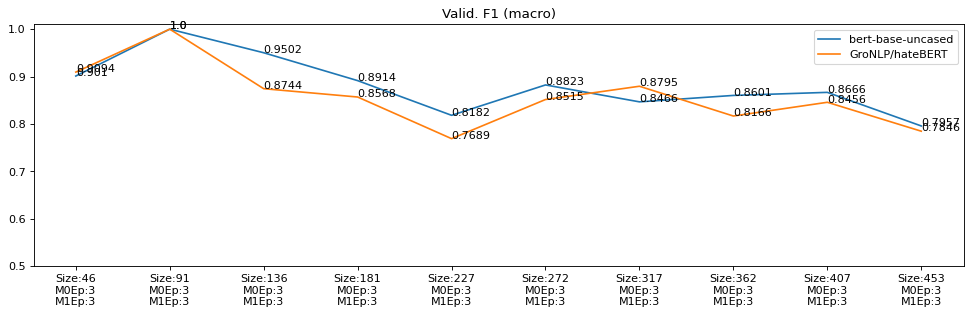

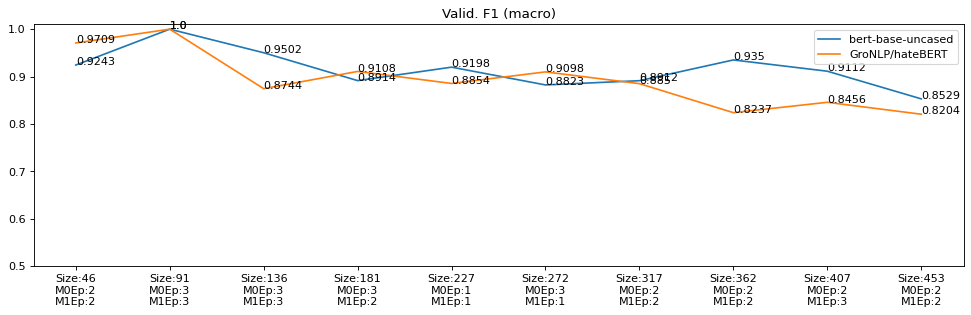

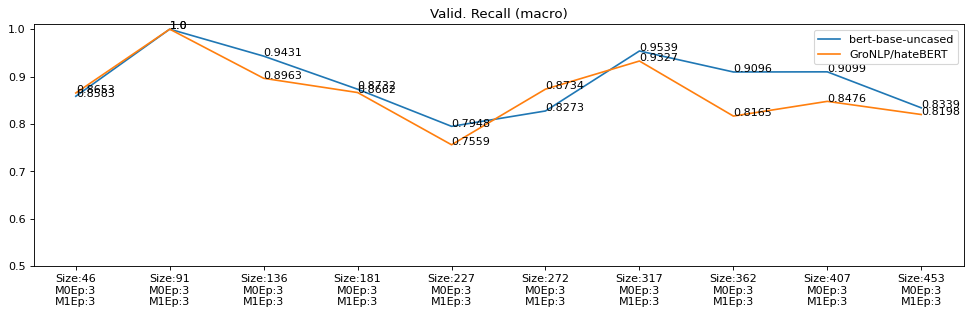

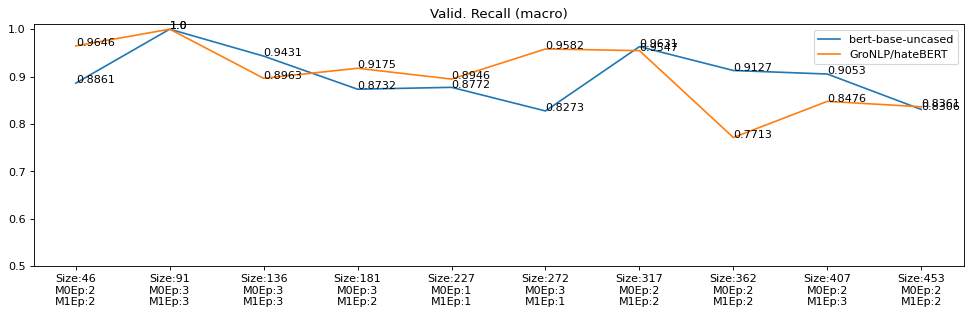

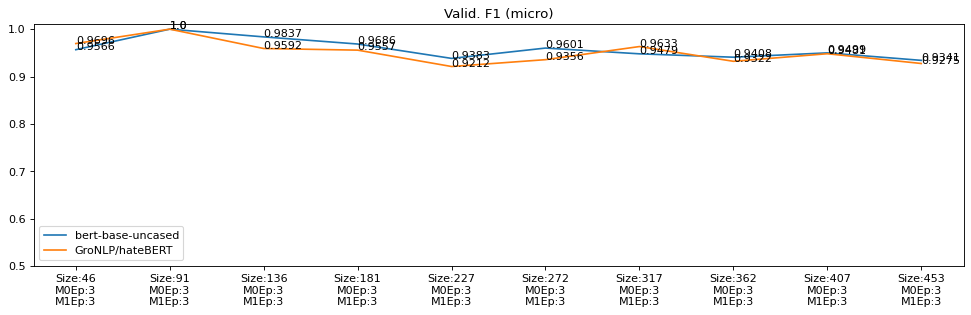

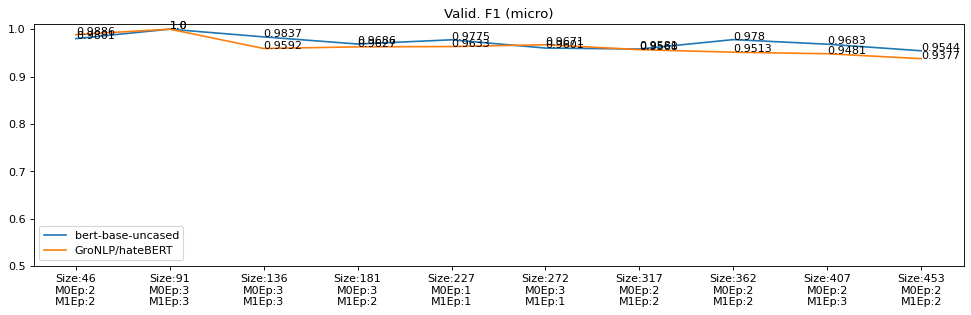

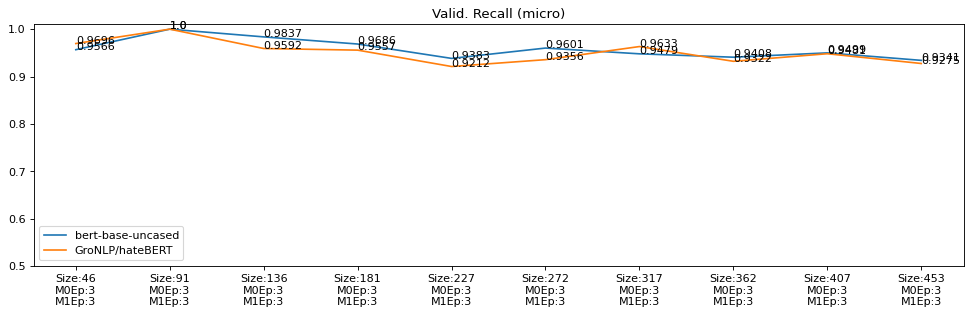

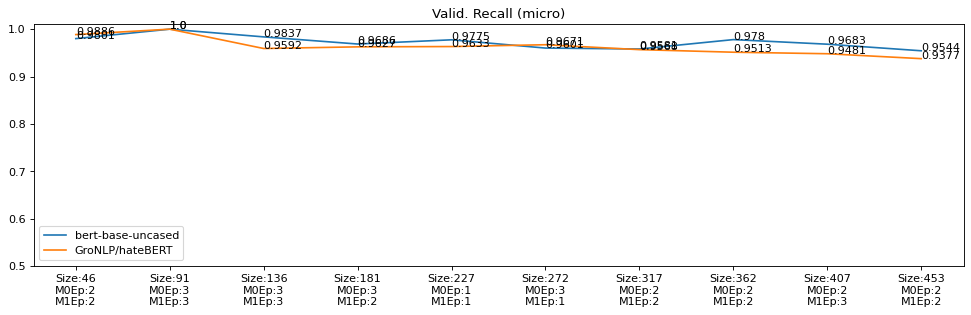

In [63]:
columns = ["Valid. F1 (macro)",
           "Valid. Recall (macro)",
           "Valid. F1 (micro)",
           "Valid. Recall (micro)"]

%reload_ext autoreload

model_names = [ bert_base_model, hate_bert_model ]

for col in columns:
    plot = mlclassif_utilities.draw_statistics_of_models_ac(
        df_statistics_bert_AL, 
        col, 
        withLabelsInPlot=True, 
        showPlot=True, showScatter=True, 
        _title=col, 
        bestMetricSelection=False
    )
    plot = mlclassif_utilities.draw_statistics_of_models_ac(
        df_statistics_bert_AL, 
        col, 
        withLabelsInPlot=True, 
        showPlot=True, showScatter=True, 
        _title=col, 
        bestMetricSelection=True
    )
    #col_name = col.replace(".", "").replace("(", "-").replace(")", "").replace(" ", "") + "-ALwoCV"
    #mlclassif_utilities.save_plot(plot, path=LCL_PATH_PLOTS, pattern=col_name)

## Active learning with Cross-Validation

In [11]:
bert_base_8batch_actLrng_wCV = "logs/Dataset_v1/ActiveLearning/ActLrng-baseBert-8btch-CV-Test/20230131044858_bert-base-uncased-active_learning-binary-epochs3-batchSize8_statistics_model.json"
hate_bert_8batch_actLrng_wCV = "logs/Dataset_v1/ActiveLearning/ActLrng-HateBert-8btch-CV-Test/20230130194031_GroNLP-hateBERT-active_learning-binary-epochs3-batchSize8_statistics_model.json"

### Read JSON files and store them into JSON Objects

In [14]:
json_bert_base_8batch_actLrng_wCV = gral_utilities.read_json_file(
                        bert_base_8batch_actLrng_wCV
                )
    

json_hate_bert_8batch_actLrng_wCV = gral_utilities.read_json_file(
                        hate_bert_8batch_actLrng_wCV
                )

json_lengths_hate_bert = [
    { "id_split": 1, "length_training": 342, "length_validation": 86, "length_test": 48},
    { "id_split": 2, "length_training": 685, "length_validation": 171, "length_test": 96},
    { "id_split": 3, "length_training": 1028, "length_validation": 257, "length_test": 143},
    { "id_split": 4, "length_training": 1370, "length_validation": 343, "length_test": 191},
    { "id_split": 5, "length_training": 1714, "length_validation": 428, "length_test": 238},
    { "id_split": 6, "length_training": 2056, "length_validation": 514, "length_test": 286},
    { "id_split": 7, "length_training": 2398, "length_validation": 600, "length_test": 334},
    { "id_split": 8, "length_training": 2742, "length_validation": 685, "length_test": 381},
    { "id_split": 9, "length_training": 3084, "length_validation": 771, "length_test": 429},
    { "id_split": 10, "length_training": 3433, "length_validation": 858, "length_test": 477}
]

In [ ]:
#json_bert_base_8batch_actLrng_wCV[GLB_ACTIVE_TRAINING][0].keys()

In [16]:
#gral_utilities.print_structure_json(json_bert_base_8batch_actLrng_wCV, limit_depth=6)

In [17]:
df_statistics_bert_base_ac_cv = mlclassif_utilities.get_df_statistics_model_with_active_training_and_cross_validation(
    json_bert_base_8batch_actLrng_wCV[GLB_ACTIVE_TRAINING], 
    json_lengths_hate_bert,
    bert_base_model
)
#df_statistics_bert_base_ac_cv

In [18]:
df_statistics_hate_bert_ac_cv = mlclassif_utilities.get_df_statistics_model_with_active_training_and_cross_validation(
    json_hate_bert_8batch_actLrng_wCV[GLB_ACTIVE_TRAINING], 
    json_lengths_hate_bert,
    hate_bert_model
)
#df_statistics_hate_bert_ac_cv

In [19]:
df_statistics_bert_AL_CV = pd.concat([df_statistics_bert_base_ac_cv, df_statistics_hate_bert_ac_cv])
df_statistics_bert_AL_CV

,model,id_split,id_cross_val_x,epoch,Training Loss,Training Accur.,Training Precision (macro),Training Precision (micro),Training Recall (macro),Training Recall (micro),...,Test Accur.,Test Precision (macro),Test Precision (micro),Test Recall (macro),Test Recall (micro),Test F1 (macro),Test F1 (micro),length_training,length_validation,length_test
0,bert-base-uncased,1,1,1,0.295278,0.915945,0.521712,0.915945,0.505261,0.915945,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,342,86,48
1,bert-base-uncased,1,1,2,0.134386,0.937864,0.849695,0.937864,0.674082,0.937864,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,342,86,48
2,bert-base-uncased,1,1,3,0.021482,0.999490,0.999718,0.999490,0.997369,0.999490,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,342,86,48
3,bert-base-uncased,1,2,1,0.059271,0.980738,0.940242,0.980738,0.871469,0.980738,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,342,86,48
4,bert-base-uncased,1,2,2,0.021913,0.996375,0.997977,0.996375,0.983254,0.996375,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,342,86,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,GroNLP/hateBERT,10,4,2,0.008085,0.998828,0.998315,0.998828,0.995562,0.998828,...,0.913587,0.789003,0.913587,0.784171,0.913587,0.785924,0.913587,3433,858,477
146,GroNLP/hateBERT,10,4,3,0.002641,0.999610,0.999783,0.999610,0.998096,0.999610,...,0.913587,0.789003,0.913587,0.784171,0.913587,0.785924,0.913587,3433,858,477
147,GroNLP/hateBERT,10,5,1,0.018419,0.995787,0.987522,0.995787,0.986843,0.995787,...,0.913587,0.789003,0.913587,0.784171,0.913587,0.785924,0.913587,3433,858,477
148,GroNLP/hateBERT,10,5,2,0.019417,0.998738,0.996225,0.998738,0.996814,0.998738,...,0.913587,0.789003,0.913587,0.784171,0.913587,0.785924,0.913587,3433,858,477


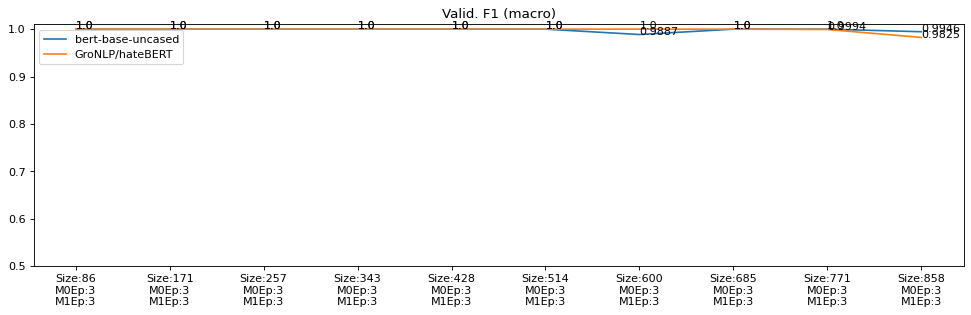

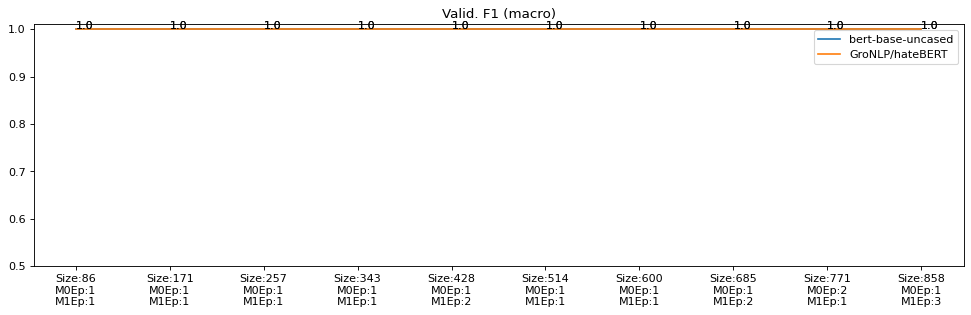

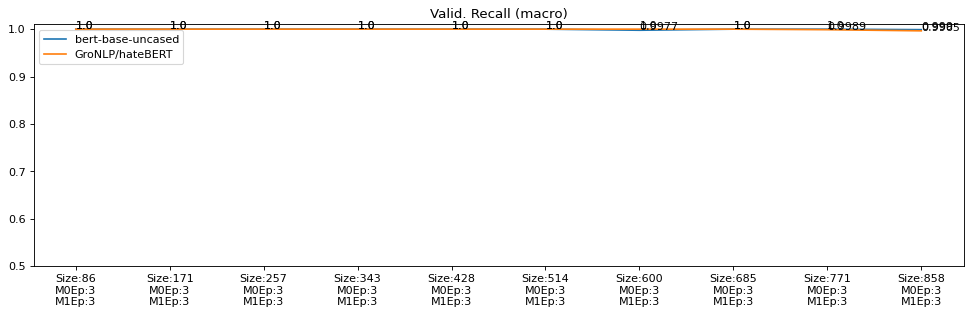

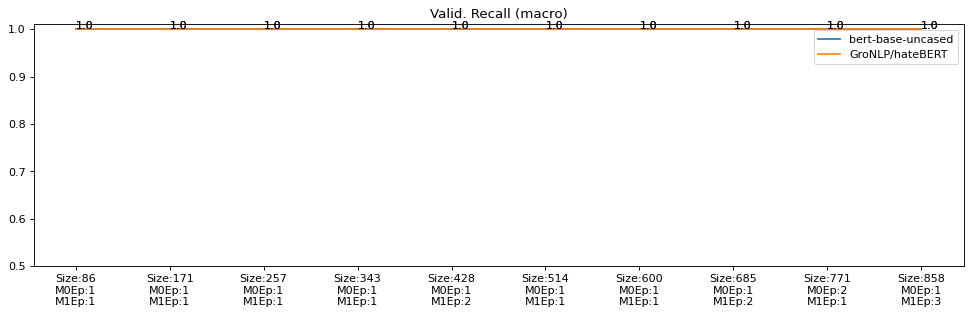

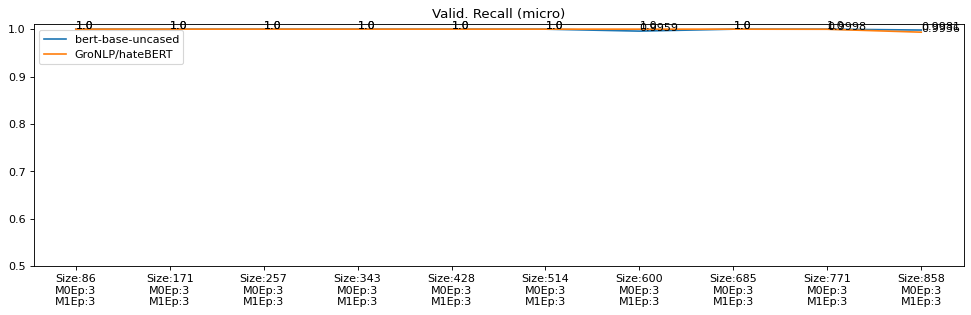

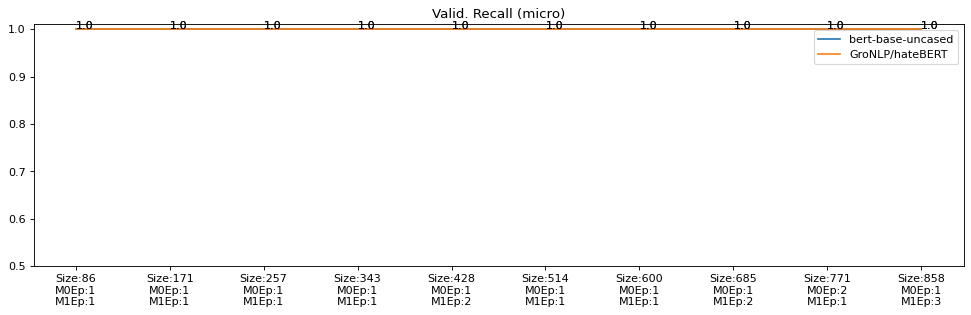

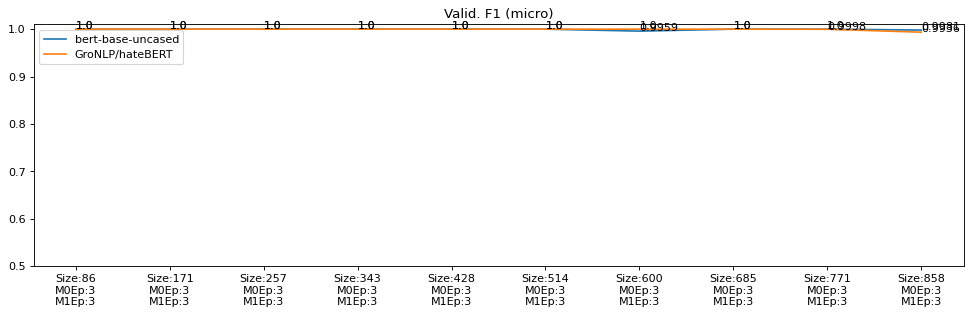

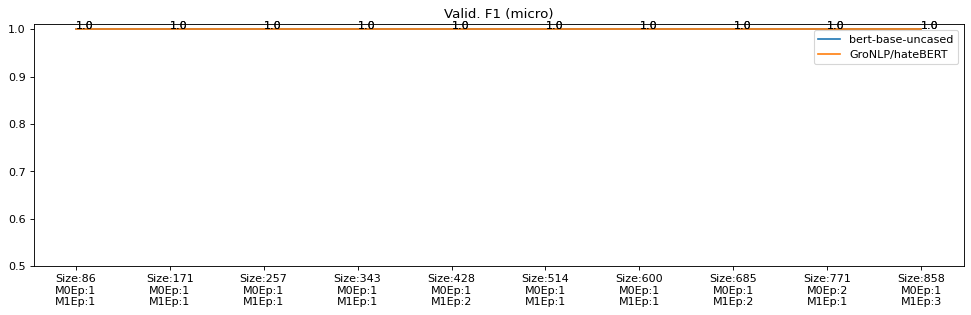

In [62]:
columns = ["Valid. F1 (macro)",
           "Valid. Recall (macro)",
           "Valid. Recall (micro)",
           "Valid. F1 (micro)"]
model_names = [ bert_base_model, hate_bert_model ]

%reload_ext autoreload

for col in columns:
    plot = mlclassif_utilities.draw_statistics_of_models_ac(
        df_statistics_bert_AL_CV, 
        col, 
        withLabelsInPlot=True, 
        showPlot=True, showScatter=True, 
        _title=col,
        bestMetricSelection=False,
        dfHasCrossValidation=True
    )
    #col_name = col.replace(".", "").replace("(", "-").replace(")", "").replace(" ", "") + "-ALwCV"
    #mlclassif_utilities.save_plot(plot, path=LCL_PATH_PLOTS, pattern=col_name)
    plot = mlclassif_utilities.draw_statistics_of_models_ac(
        df_statistics_bert_AL_CV, 
        col, 
        withLabelsInPlot=True, 
        showPlot=True, showScatter=True, 
        _title=col, 
        bestMetricSelection=True,
        dfHasCrossValidation=True
    )

## How does this look like with unseen data

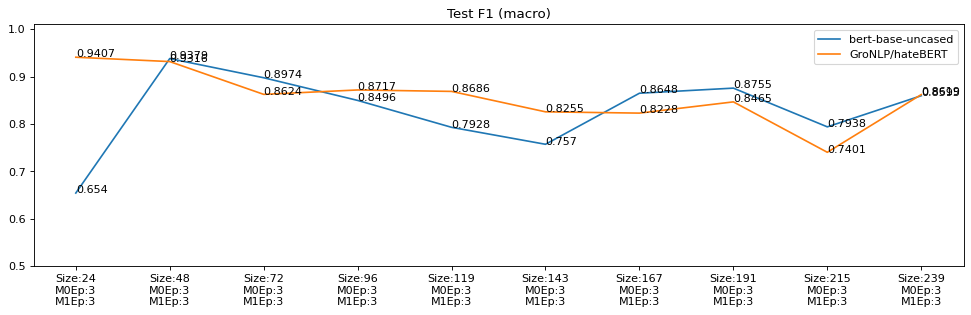

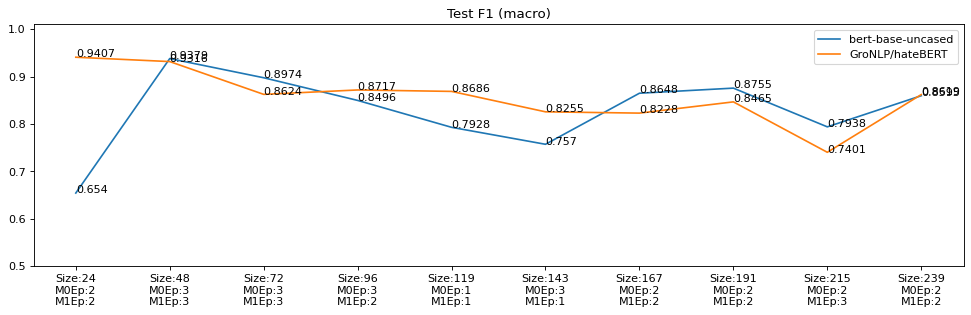

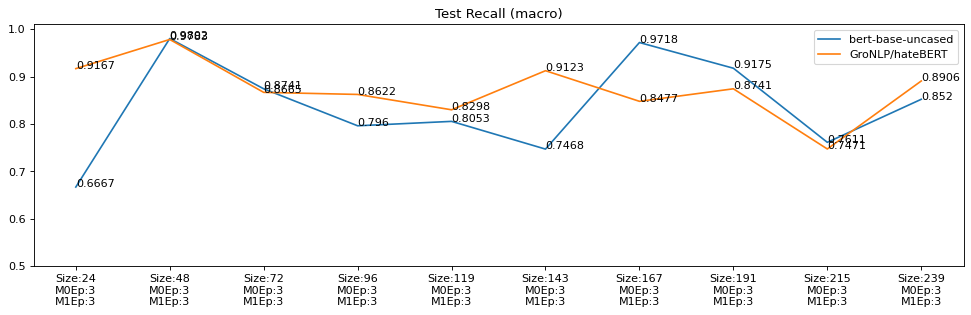

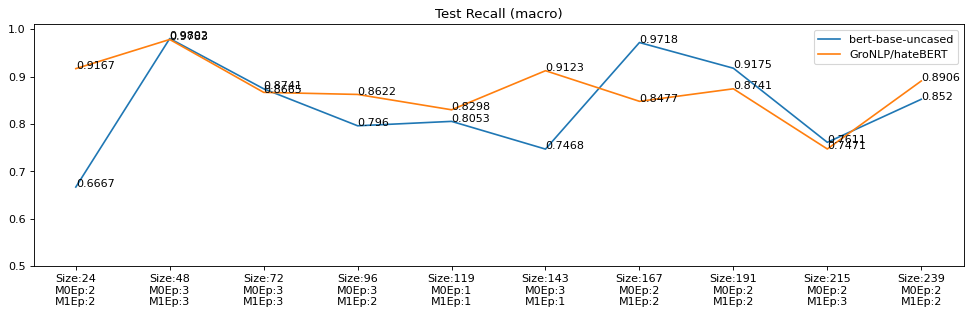

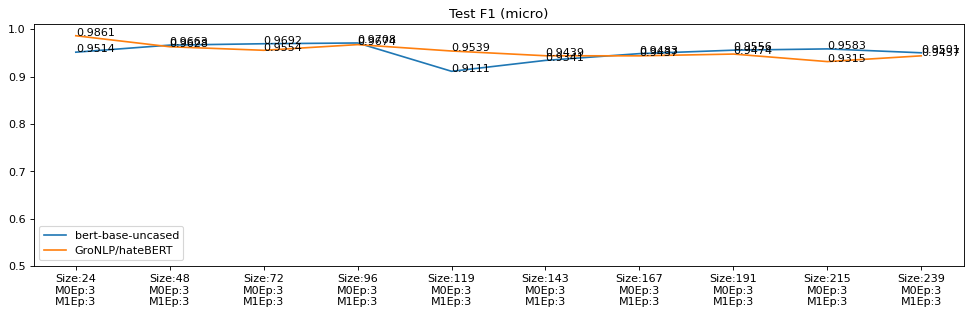

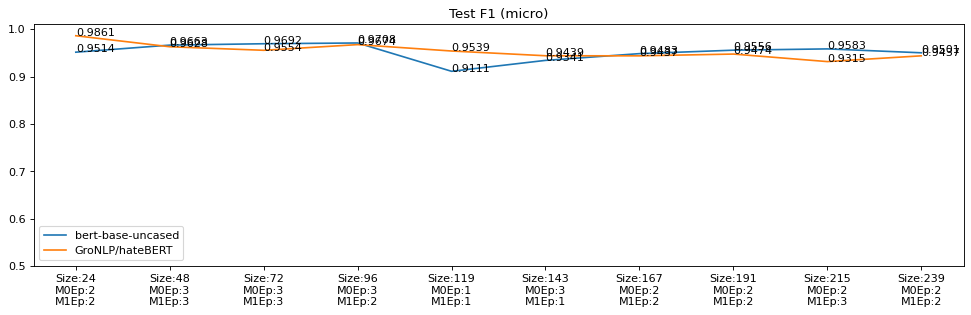

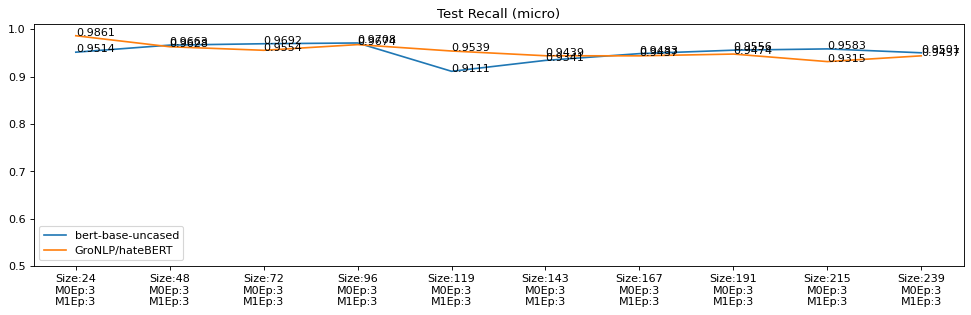

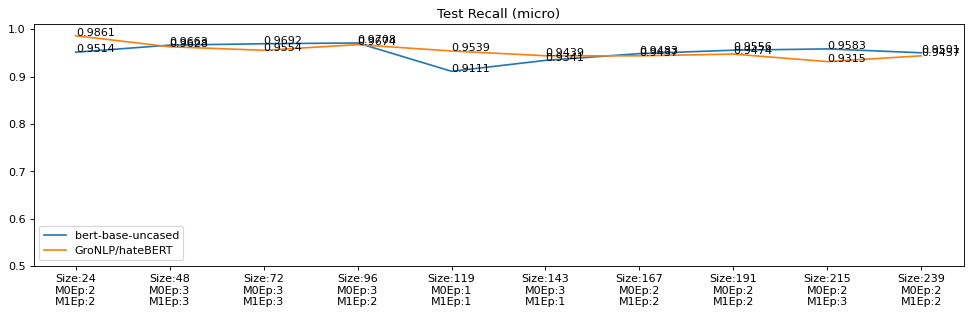

In [61]:
columns = ["Test F1 (macro)",
           "Test Recall (macro)",
           "Test F1 (micro)",
           "Test Recall (micro)"
           ]

for col in columns:
    plot = mlclassif_utilities.draw_statistics_of_models_ac(
        df_statistics_bert_AL, 
        col, 
        withLabelsInPlot=True, 
        showPlot=True, showScatter=True, 
        _title=col,
        bestMetricSelection=False,
        dfHasCrossValidation=False)
    
    #col_name = col.replace(".", "").replace("(", "-").replace(")", "").replace(" ", "") + "-ALwoCV"
    #mlclassif_utilities.save_plot(plot, path=LCL_PATH_PLOTS, pattern=col_name)
    plot = mlclassif_utilities.draw_statistics_of_models_ac(
        df_statistics_bert_AL, 
        col, 
        withLabelsInPlot=True, 
        showPlot=True, showScatter=True, 
        _title=col,
        bestMetricSelection=True,
        dfHasCrossValidation=False)

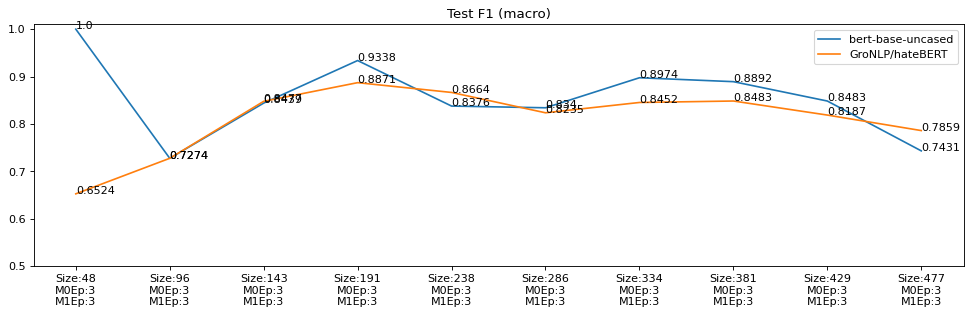

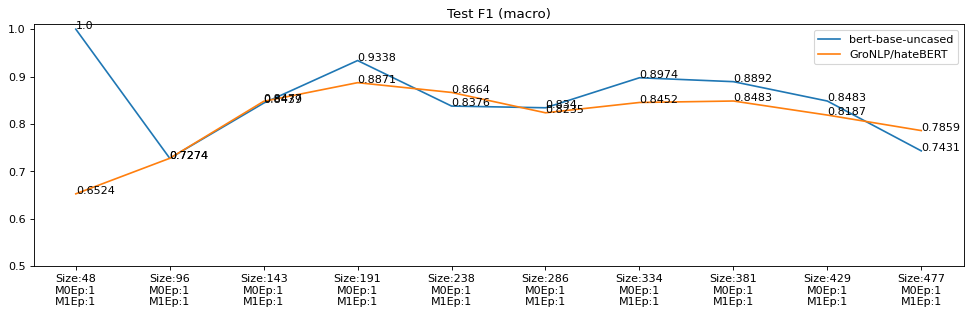

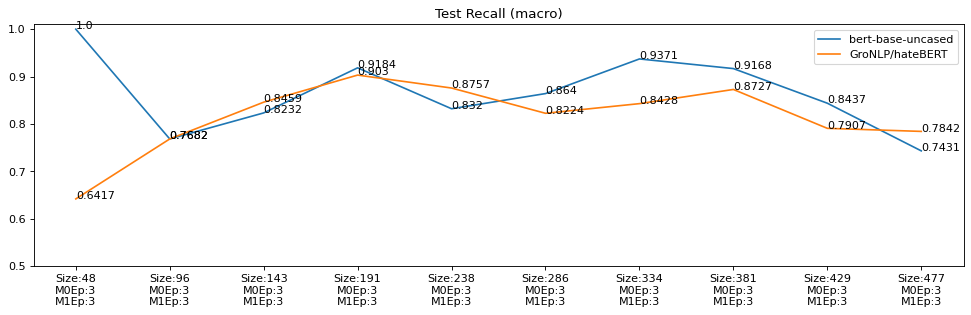

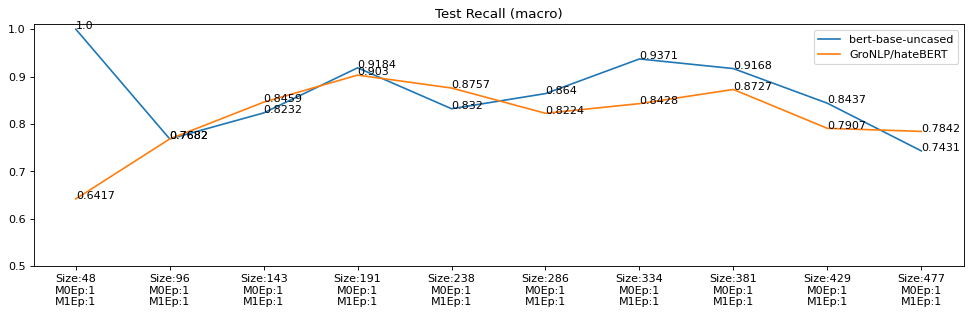

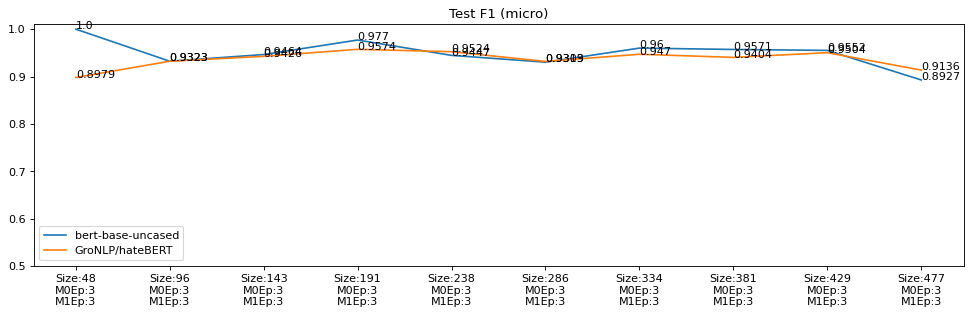

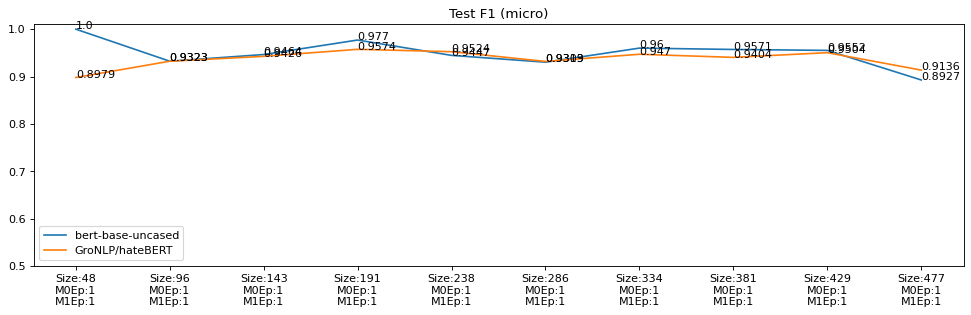

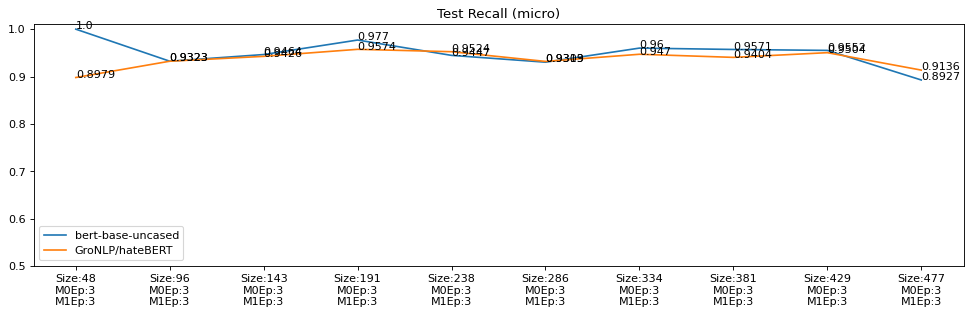

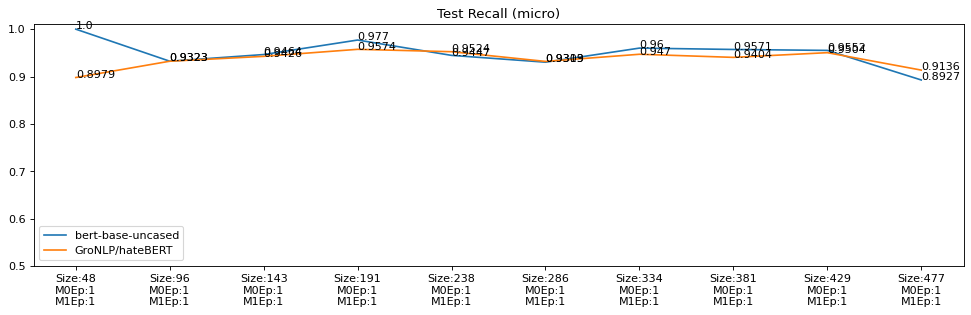

In [54]:
%reload_ext autoreload

columns = ["Test F1 (macro)",
           "Test Recall (macro)",
           "Test F1 (micro)",
           "Test Recall (micro)"
           ]

for col in columns:
    plot = mlclassif_utilities.draw_statistics_of_models_ac(
        df_statistics_bert_AL_CV, #This filter just acts as parameter to delete rows 
        col, 
        withLabelsInPlot=True, 
        showPlot=True, showScatter=True, 
        _title=col,
        bestMetricSelection=False,
        dfHasCrossValidation=True)
    #col_name = col.replace(".", "").replace("(", "-").replace(")", "").replace(" ", "") + "-ALwCV"
    #mlclassif_utilities.save_plot(plot, path=LCL_PATH_PLOTS, pattern=col_name)

    plot = mlclassif_utilities.draw_statistics_of_models_ac(
        df_statistics_bert_AL_CV, #This filter just acts as parameter to delete rows 
        col, 
        withLabelsInPlot=True, 
        showPlot=True, showScatter=True, 
        _title=col,
        bestMetricSelection=True,
        dfHasCrossValidation=True)

### How does this look when comparing VAL and TEST (without Cross-Validation)

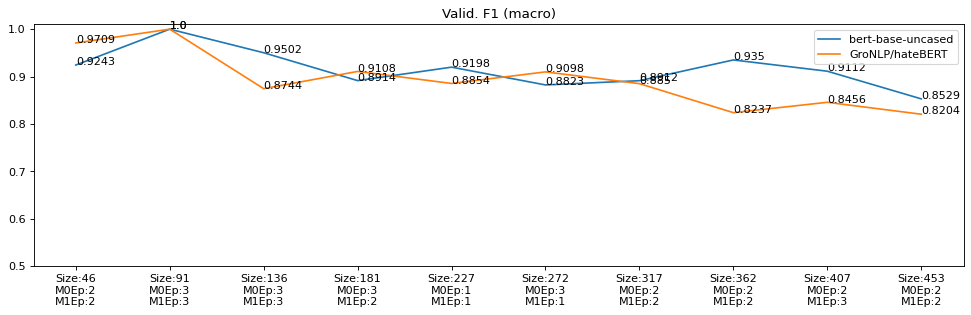

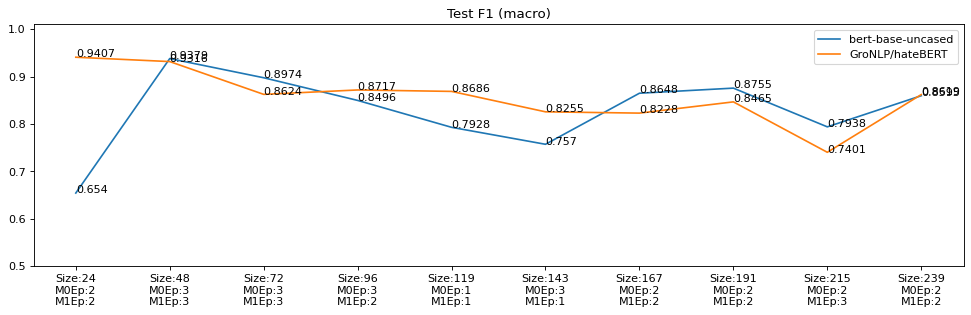

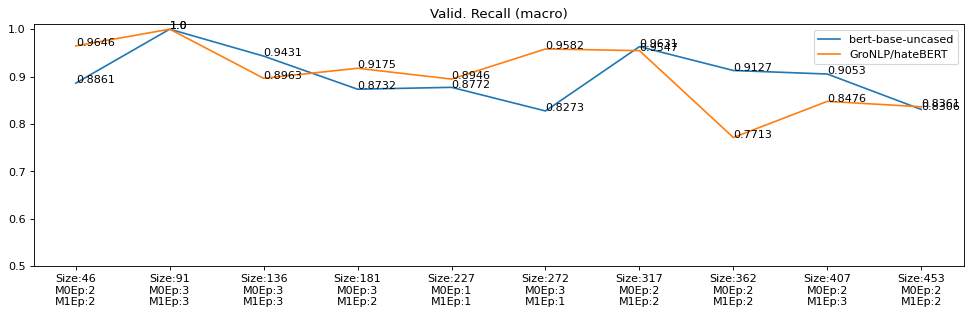

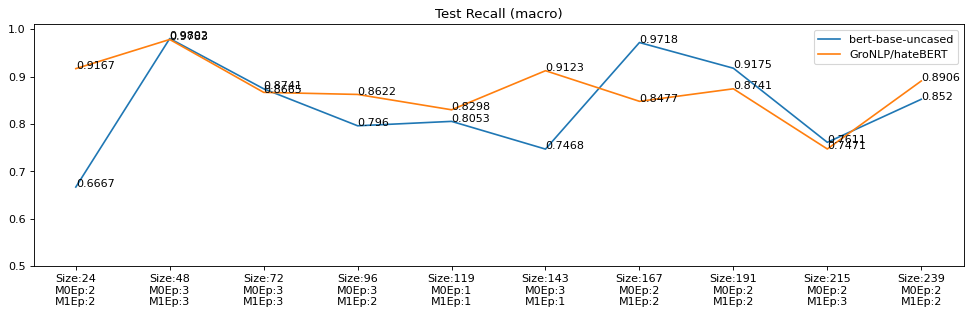

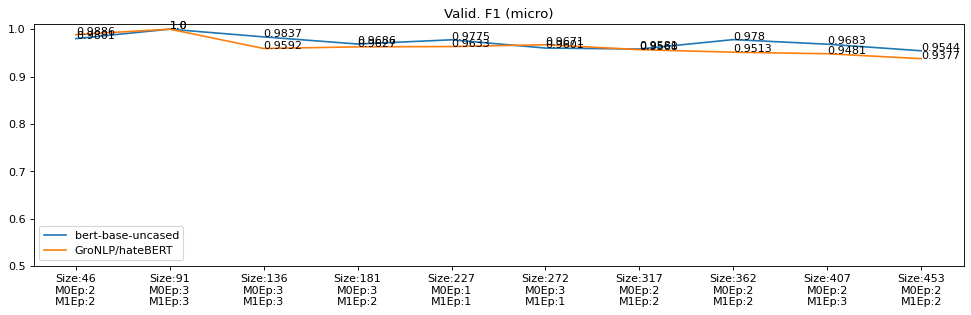

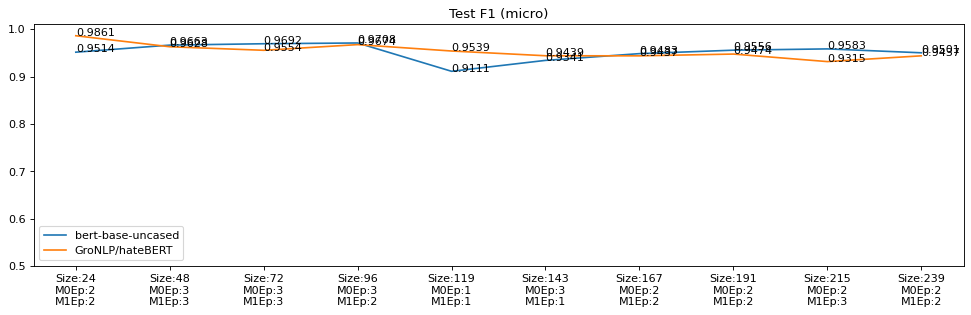

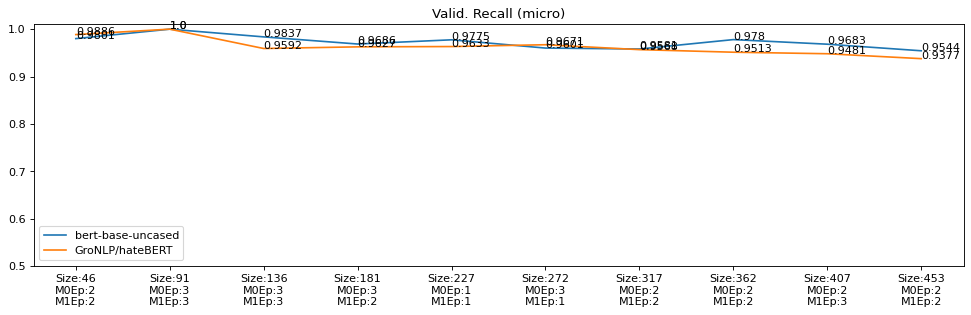

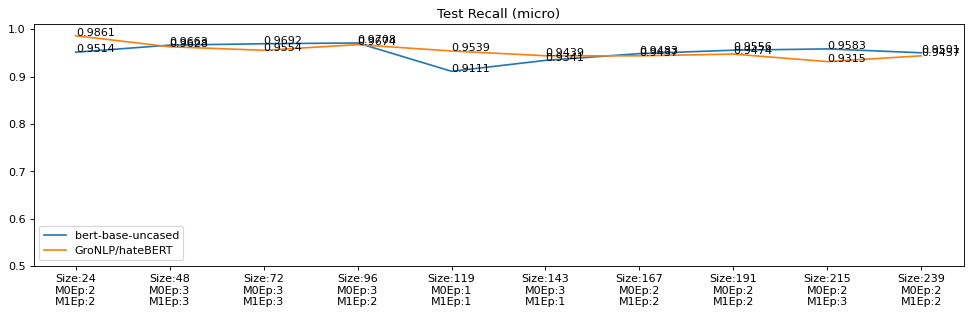

In [60]:
%reload_ext autoreload

columns_val = ["Valid. F1 (macro)",
           "Valid. Recall (macro)",
           "Valid. F1 (micro)",
           "Valid. Recall (micro)"]

columns_test = ["Test F1 (macro)",
           "Test Recall (macro)",
           "Test F1 (micro)",
           "Test Recall (micro)"
           ]

for col_val, col_test in zip(columns_val, columns_test):   
    plot = mlclassif_utilities.draw_statistics_of_models_ac(
        df_statistics_bert_AL, 
        col_val, 
        withLabelsInPlot=True, 
        showPlot=True, showScatter=True, 
        _title=col_val, 
        bestMetricSelection=True,
        dfHasCrossValidation=True
    )
    #col_name = col.replace(".", "").replace("(", "-").replace(")", "").replace(" ", "") + "-ALwCV"
    #mlclassif_utilities.save_plot(plot, path=LCL_PATH_PLOTS, pattern=col_name)

    #========================================================================
    
    plot = mlclassif_utilities.draw_statistics_of_models_ac(
        df_statistics_bert_AL, #This filter just acts as parameter to delete rows 
        col_test, 
        withLabelsInPlot=True, 
        showPlot=True, showScatter=True, 
        _title=col_test,
        bestMetricSelection=True,
        dfHasCrossValidation=True)
    

### How does this look when comparing VAL and TEST (with Cross-Validation)

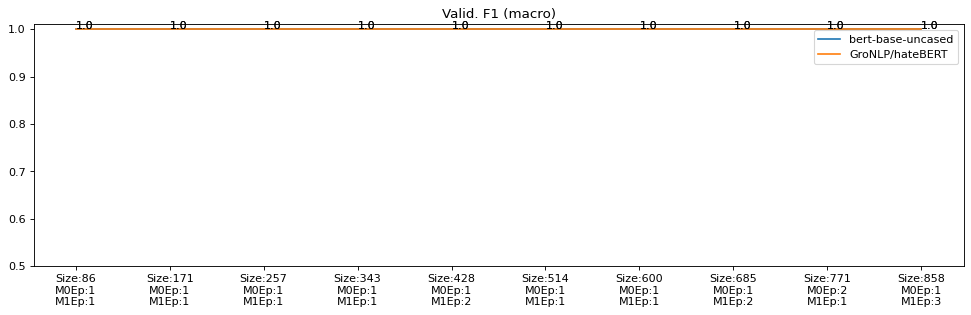

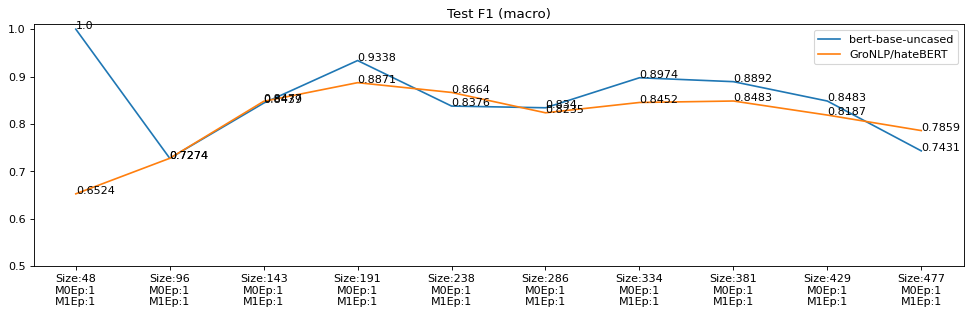

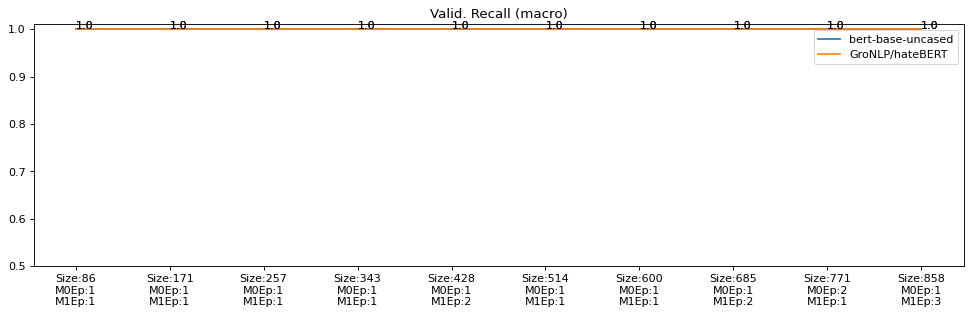

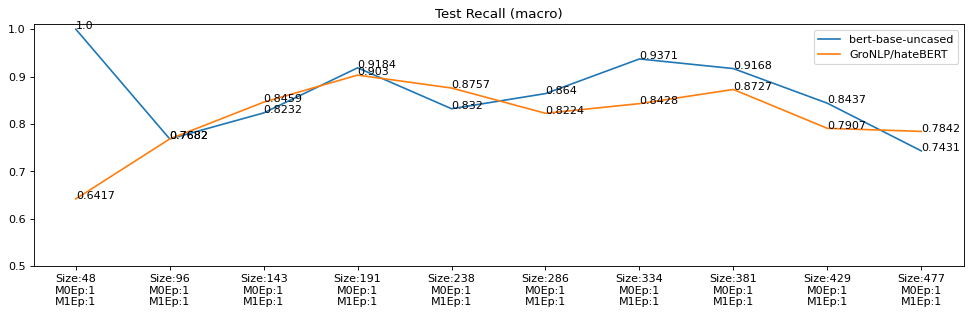

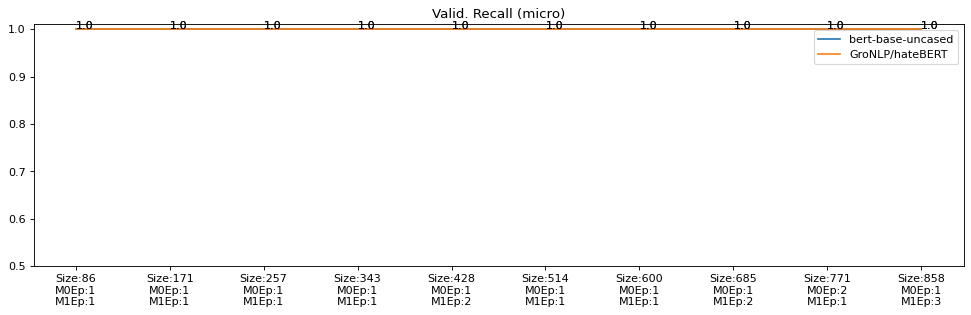

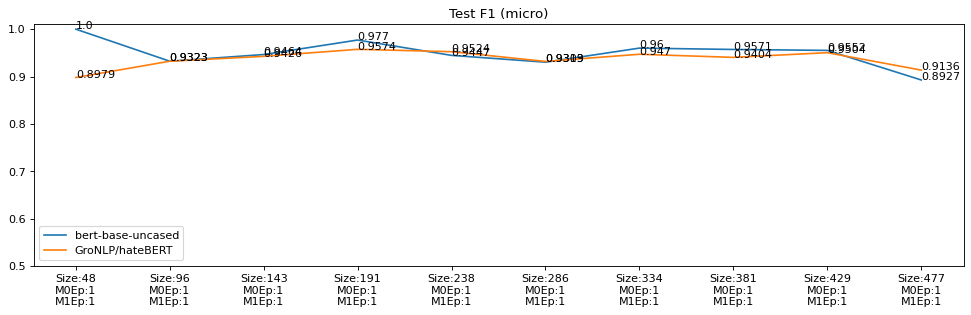

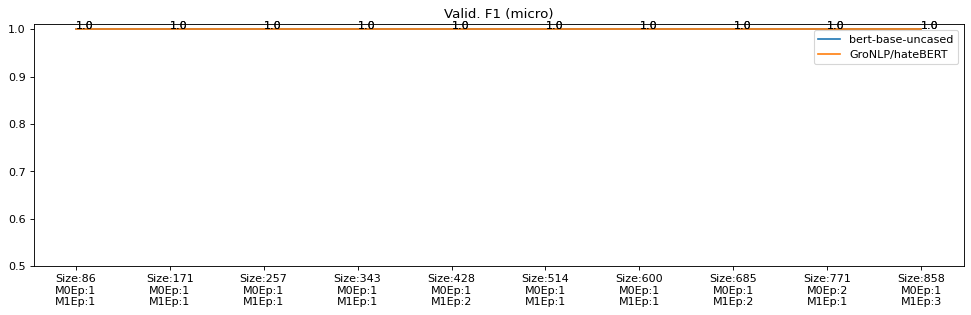

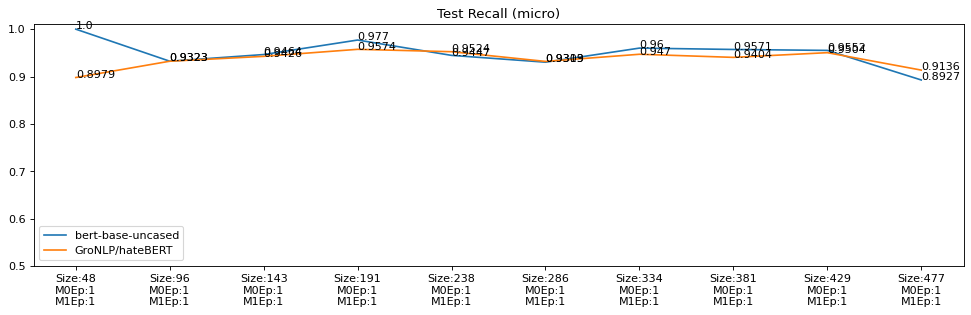

In [58]:
%reload_ext autoreload

columns_val = ["Valid. F1 (macro)",
           "Valid. Recall (macro)",
           "Valid. Recall (micro)",
           "Valid. F1 (micro)"]

columns_test = ["Test F1 (macro)",
           "Test Recall (macro)",
           "Test F1 (micro)",
           "Test Recall (micro)"
           ]

for col_val, col_test in zip(columns_val, columns_test):   
    plot = mlclassif_utilities.draw_statistics_of_models_ac(
        df_statistics_bert_AL_CV, 
        col_val, 
        withLabelsInPlot=True, 
        showPlot=True, showScatter=True, 
        _title=col_val, 
        bestMetricSelection=True,
        dfHasCrossValidation=True
    )
    #col_name = col.replace(".", "").replace("(", "-").replace(")", "").replace(" ", "") + "-ALwCV"
    #mlclassif_utilities.save_plot(plot, path=LCL_PATH_PLOTS, pattern=col_name)

    #========================================================================
    
    plot = mlclassif_utilities.draw_statistics_of_models_ac(
        df_statistics_bert_AL_CV, #This filter just acts as parameter to delete rows 
        col_test, 
        withLabelsInPlot=True, 
        showPlot=True, showScatter=True, 
        _title=col_test,
        bestMetricSelection=True,
        dfHasCrossValidation=True)
    